1.한 공장에서 생산된 제품에서 최근 추정 불량률은 90%였다.

오차의 한계가 5% 이하가 되도록 하는 최소 표본사이즈를 구하시오.

In [1]:
# 모비율에 대한 추정 : 95% 신뢰구간. 모집단 평균이 포함되는 구간이 95%의 확률로 생성된다는 뜻
# 모비율(최근 추정불량률90%) = 0.90
# 신뢰수준(95%) Z=1.96
# 허용오차 = 0.05

# 표본비율의 분산
# s^2 = p(1-p)/n 이므로 아래의 공식 대입하여 계산

# 모비율 p를 추정할 때, 신뢰수준 1-α, 허용오차 e에 대한 표본 크기 n
# n = (Zα/2)^2 * p * (1-p) / e^2

# n = (1.96)^2 * 0.9 * (1-0.9) / 0.05^2
#    ≈ 138.3

def sample_size (p, z, e) :
    n = (z**2)*p*(1-p)/(e**2)
    print("최소 샘플사이즈는 {}보다 커야합니다".format(n))

sample_size(0.9, 1.96, 0.05)

# 최소 샘플사이즈는 138.29759999999993보다 커야합니다.
# 정답 : 139

최소 샘플사이즈는 138.29759999999993보다 커야합니다


2.다음은 1월부터 9월까지의 은의 가격이다.

      1M    2M    3M     4M     5M     6M     7M     8M     9M
    12.14  42.6  34.4  35.29  30.96  57.12  37.84  42.49  31,38

(1) 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그리시오.

(2) 1월 대비 9월의 은의 가격은 몇 % 올랐는가? (소수점 두번째 자리에서 반올림)

In [ ]:
# (1) 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그리시오.

#라이브러리 불러오기
import pandas as pd
import numpy as np
data= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem4.csv")
data

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [ ]:
#파생변수를 추가하기 위해서 행열변환
ma_data = data.transpose()
ma_data.columns = ["month_price"]
ma_data

,month_price
1M,12.14
2M,42.60
3M,34.40
4M,35.29
5M,30.96
6M,57.12
7M,37.84
8M,42.49
9M,31.38


In [ ]:
# 3개월 이동평균 값을 ma_3에 저장하였다.
# 인덱싱을 활용하였으며 데이터가 얼마되지 않으므로 반복문은 사용하지 않았음.
ma_data["ma_3"] =0
ma_data.loc["3M", "ma_3"] = ma_data["month_price"][0:3].mean ()
ma_data.loc["4M", "ma_3"] = ma_data["month_price"][1:4].mean()
ma_data.loc["5M","ma_3"] = ma_data["month_price"][2:5].mean()
ma_data.loc["6M", "ma_3"] = ma_data["month_price"][3:6].mean()
ma_data.loc["7M", "ma_3"] = ma_data["month_price"][4:7].mean()
ma_data.loc["8M", "ma_3"] = ma_data["month_price"][5:8].mean()
ma_data.loc["9M", "ma_3"] = ma_data["month_price"][6:9].mean()
ma_data

<ipython-input-12-7e063c3c7406>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '29.713333333333335' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ma_data.loc["3M", "ma_3"] = ma_data["month_price"][0:3].mean ()


,month_price,ma_3
1M,12.14,0.000000
2M,42.60,0.000000
3M,34.40,29.713333
4M,35.29,37.430000
5M,30.96,33.550000
6M,57.12,41.123333
7M,37.84,41.973333
8M,42.49,45.816667
9M,31.38,37.236667


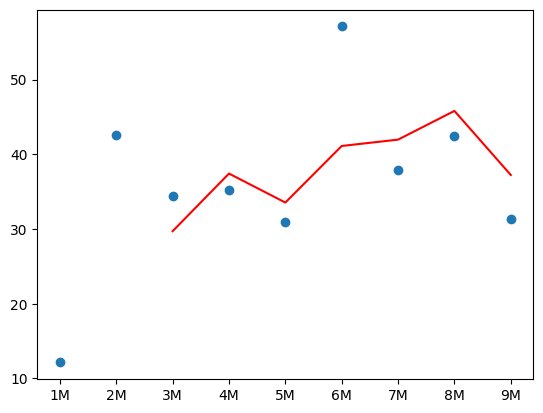

In [ ]:
# 시각화 진행
import matplotlib.pyplot as plt
plt.scatter (x=ma_data.index, y = ma_data["month_price"])
plt.plot(ma_data.index [2:], ma_data["ma_3"][2:],c='red')

In [ ]:
# (2) 1월 대비 9월의 은의 가격은 몇 % 올랐는가? (소수점 두번째 자리에서 반올림)

round (ma_data["month_price"][-1]/ma_data["month_price"][0]*100,1)
# 31.38 / 12.14 * 100

# 정답 258.5상승함

<ipython-input-14-734ad1e8afd6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  round (ma_data["month_price"][-1]/ma_data["month_price"][0]*100,1)


258.5

3.아래 그래프는 A, B, C 자치구별 H 의원에 대한 찬성, 반대 투표 결과이다.

자치구별 지지율이 같은지에 대해서 검정하시오.

*귀무가설 - 자치구와 지지율은 독립이다.

*대립가설 - 자치구와 지지율은 독립이 아니다.

In [ ]:
import pandas as pd
data = [['vote', 'A', 'B', 'C'],
        ['찬성', 176, 193, 159],
        ['반대', 124, 107, 141]
        ]
df = pd.DataFrame(data[1:], columns=data[0])
print(df)

## 교차표를 만들어 주기 위해 인덱스 설정
df.set_index('vote',inplace=True)
df

#카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(df)
print(chi, p, df, expect)

# p-value : 0.01882272023214683 < 0.05
# p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
# 자치구와 지지율은 독립이 아니라고 할 수 있다. 즉, 자치구별 H의원에 대한 지지율은 다르다.


  vote    A    B    C
0   찬성  176  193  159
1   반대  124  107  141
7.945381231671554 0.01882272023214683 2 [[176. 176. 176.]
 [124. 124. 124.]]


4.A학교 남녀 학생들의 평균 혈압 차이가 있는지 여부에 대한 검정하시오

(단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정).

 (1) 남녀 학생들의 평균 혈압 차이가 있는지에 대해 가설을 설정하시오.

 (2) 검정통계량을 구하고 판단하시오.

 (3) 평균 혈압차의 신뢰구간을 구했을 때, 판단한 결과가 (2)의 결과를 지지하는지 설명하시오.

In [ ]:
# (1) 남녀 학생들의 평균 혈압 차이가 있는지에 대해 가설을 설정하시오.
# 귀무가설 - A학교에서 성별에 따른 평균 혈압 차이는 없다.
# 대립가설 - A학교에서 성별에 따른 평균 혈압 차이는 있다.

import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem6.csv")
data.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


In [ ]:
# (2) 검정통계량을 구하고 판단하시오.
#성별에 따른 혈압이 등분산성을 만족한다는 조건 하에 독립성 t검정 수행
import scipy.stats as stats

male = data. loc[data.gender == 'male', 'pressure']
female = data. loc[data.gender == 'female', 'pressure']

test_result = stats. ttest_ind (male, female, equal_var=True)
test_result

# 김정통계량은 1.3813481801194591
# 검정 결과 귀무가설은 기각하지 못한다.
# p-value=0.18044550626193734 > 0.05
# 즉, 성별에 따라 평균 혈압의 차이가 없다고 할 수 있다.

TtestResult(statistic=1.3813481801194591, pvalue=0.18044550626193734, df=23.0)

In [ ]:
# (3) 평균 혈압차의 신뢰구간을 구했을 때, 판단한 결과가 (2)의 결과를 지지하는지 설명하시오.

# 차이에 대한 신뢰구간은 기각역에 Sp/sqrt(1/n1+1/m2)'를 해주면 된다.
# 혹은 '패키지 내에 있는 interval 함수를 사용하면 된다.

#평균과 신뢰구간
from numpy import array, mean
from scipy.stats import sem, t
import numpy as np
## 통합 표준편차(Sp)를 구하는 공식이 복잡하므로 함수를 만들어 사용
def sp(data1, data2):
    df = len(data) +len (data2) -2
    s1 = (len(data1)-1) * (data1.std()**2)
    s2 = (len(data2)-1) * (data2.std()**2)
    sp = np.sqrt((s1+s2)/ df)
    return sp

alpha =0.95
dof=len(male) +len(female) -2
diff_mean = male.mean() - female.mean()
s = sp(male, female) * (1/len (male) +1/len(female))
CI = t.interval(alpha, dof, loc = diff_mean, scale = s)
CI

# 소수점 4째 자리에서 반올림한 신뢰구간은 [2.495. 8.098]이다.
# 우리가 검정에 사용했던 남자평균- 여자평균의 값이 5.29**이었으므로
# 신뢰구간을 구한 결과도 앞선 독립 2표본 t검정 결과를 지지한다.

(2.4946163867330915, 8.098439168822473)

5.height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv 파일을 가지고 다음을 분석하시오.

A시의 20대 남성 411명을 임의로 추출한 후 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.

이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보시오.

(1) 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.

조건1: 베이지안 회귀모델을 사용

조건2: 1000번의 burn-in 이후 10,000의 MCMC를 수행

조건3: 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution)

조건4: 오차항의 분산의 사전분포는 역감마 분포로 지정

조건5: 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정

(2) 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하시오.

In [3]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem7.csv")
data

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
...,...,...,...
406,174.207,73.736,80.1779
407,174.702,74.529,80.1306
408,176.858,76.083,80.4527
409,175.566,76.459,80.2019


In [4]:
# (1) 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.

# 조건1: 베이지안 회귀모델을 사용
# 조건2: 1000번의 burn-in 이후 10,000의 MCMC를 수행
# 조건3: 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution)
# 조건4: 오차항의 분산의 사전분포는 역감마 분포로 지정
# 조건5: 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정

from sklearn import linear_model
# help(linear_model)
from sklearn.linear_model._bayes import ARDRegression
# 베이지안 ARD 회귀 (Bayesian Automatic Relevance Determination Regression)

# 1000번의 burn-in 이후 10,000의 MCMC를 수행
# 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution)
# 오차항의 분산의 사전분포는 역감마 분포로 지정
# 이때, 형상(Shape) 모수와 척도(Scale) 모수는 각각 0.005로 지정

from sklearn.model_selection import train_test_split

#훈련 테스트 데이터세트 분리
X = data[["height", "weight"]]
y = data["waistline"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=7)
clf = ARDRegression(max_iter=1000, alpha_2=0.005, lambda_1=0.005,fit_intercept =False )
## 부적절한 균일분포
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.coef_)

# 회귀계수는 [ 0.53879393, -0.19168936] 이다.

# (2) 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하시오.

print(clf.predict([[180,85]]))

# 추정몸무게는 80.7이다.

[ 0.53879393 -0.19168936]
[80.68931085]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but ARDRegression was fitted with feature names
  warnings.warn(
